# WheaterPy

In [1]:
# Dependencies
import requests as req
import json
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
api_key = "51ee6e52bf739aa24fc1ad42a29c39b4"
url = "http://api.openweathermap.org/data/2.5/weather?q="

### World Cities

In [3]:
# Set values for latitude and longitude 
lat = range(-90, 90, 5)
log= range(-180, 180, 5)

cities = []
lat_log = []
s = []

# loop through latitude and longitude to find all the cities
for i in lat:
    for j in log:
        city = citipy.nearest_city(i, j)

        cities.append(city.city_name)
        lat_log.append((i, j))

# Create Dataframe of all the city found
city_dict = {'city_name': cities, 'lat_long': lat_log}
cities_info = pd.DataFrame(city_dict)
# Drop all the duplictes in the cities column
cities_info.drop_duplicates(subset='city_name', keep='first', inplace=True)
cities_info.set_index('city_name')


,lat_long
city_name,
vaini,"(-90, -180)"
mataura,"(-90, -165)"
rikitea,"(-90, -140)"
punta arenas,"(-90, -125)"
ushuaia,"(-90, -90)"
hermanus,"(-90, -10)"
bredasdorp,"(-90, 15)"
kruisfontein,"(-90, 30)"
port elizabeth,"(-90, 35)"


### 500+ Random World Cities

In [4]:
# Randomly selectio of the citiens
cities_3 =cities_info.sample(600)
#cities_3

In [5]:
data = []
# Loop through cities name to get the urls and data information
for city in cities_3['city_name']:
    q = city
    query_url = url + q + "&appid=" + api_key 
    response = req.get(query_url).json()
    data.append(response)
    #print(q)
data

    

[{'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 71.92, 'lon': 114.08},
  'dt': 1513783818,
  'id': 2017155,
  'main': {'grnd_level': 1011.12,
   'humidity': 61,
   'pressure': 1011.12,
   'sea_level': 1024.54,
   'temp': 236.538,
   'temp_max': 236.538,
   'temp_min': 236.538},
  'name': 'Saskylakh',
  'sys': {'country': 'RU', 'message': 0.1643, 'sunrise': 0, 'sunset': 0},
  'weather': [{'description': 'clear sky',
    'icon': '02d',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 37.5019, 'speed': 1.36}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -28.65, 'lon': 153.62},
  'dt': 1513782000,
  'id': 2172880,
  'main': {'humidity': 88,
   'pressure': 1011,
   'temp': 296.15,
   'temp_max': 296.15,
   'temp_min': 296.15},
  'name': 'Byron Bay',
  'sys': {'country': 'AU',
   'id': 8165,
   'message': 0.1641,
   'sunrise': 1513709047,
   'sunset': 1513759351,
   'type': 1},
  'visibility': 10000,
  'weather': [{'de

In [6]:
# Get data needed 
lat_data = []
temperature_data = []
humidity_data = []
cloudiness_data = []
wind_data = []
for i,info in enumerate(data):
    
    print(info)
    if info.get("message", "City") == "city not found":
        continue

    lat = data[i]["coord"]["lat"]
    temperature = data[i]["main"]["temp"]
    humidity = data[i]["main"]["humidity"]
    cloud = data[i]["clouds"]["all"]
    wind = data[i]["wind"]["speed"]
    
    lat_data.append(lat)
    temperature_data.append(temperature)
    humidity_data.append(humidity)
    cloudiness_data.append(cloud)
    wind_data.append(wind)
    
print(lat_data, temperature_data, humidity_data, cloudiness_data, wind_data)
lat_temp = {"latitude": lat_data, "temperature": temperature_data}
pd.Series(lat_temp)
lat_temp = pd.DataFrame(lat_temp)
#lat_temp
lat_hum = {"latitude": lat_data, "humidity": humidity_data}
pd.Series(lat_hum)
lat_hum = pd.DataFrame(lat_hum)
#lat_hum
lat_cloud = {"latitude": lat_data, "cloudiness": cloudiness_data}
pd.Series(lat_cloud)
lat_cloud = pd.DataFrame(lat_cloud)
#lat_cloud
lat_wind = {"latitude": lat_data, "wind speed": wind_data}
pd.Series(lat_wind)
lat_wind = pd.DataFrame(lat_wind)
#lat_wind

{'coord': {'lon': 114.08, 'lat': 71.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 236.538, 'pressure': 1011.12, 'humidity': 61, 'temp_min': 236.538, 'temp_max': 236.538, 'sea_level': 1024.54, 'grnd_level': 1011.12}, 'wind': {'speed': 1.36, 'deg': 37.5019}, 'clouds': {'all': 8}, 'dt': 1513783818, 'sys': {'message': 0.1643, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}
{'coord': {'lon': 153.62, 'lat': -28.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1011, 'humidity': 88, 'temp_min': 296.15, 'temp_max': 296.15}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1513782000, 'sys': {'type': 1, 'id': 8165, 'message': 0.1641, 'country': 'AU', 'sunrise': 1513709047, 'sunset': 1513759351}, 'id': 2172880, 'name': 'Byron Bay', '

{'coord': {'lon': -85.62, 'lat': 44.76}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 270.15, 'pressure': 1020, 'humidity': 63, 'temp_min': 269.15, 'temp_max': 271.15}, 'visibility': 14484, 'wind': {'speed': 3.1, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1513782900, 'sys': {'type': 1, 'id': 1459, 'message': 0.1699, 'country': 'US', 'sunrise': 1513775803, 'sunset': 1513807470}, 'id': 5012495, 'name': 'Traverse City', 'cod': 200}
{'coord': {'lon': -119.74, 'lat': 49.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 270.12, 'pressure': 1017, 'humidity': 92, 'temp_min': 269.15, 'temp_max': 271.15}, 'visibility': 14484, 'wind': {'speed': 1}, 'clouds': {'all': 90}, 'dt': 1513782300, 'sys': {'type': 1, 'id': 3295, 'message': 0.1645, 'country': 'CA', 'sunrise': 1513785231, 'sunset': 1513814425}, 'id': 6100086, 'name': 'Peachla

### Latitude vs Temperature(F)

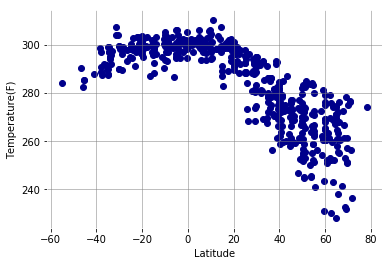

In [19]:
plt.scatter(lat_temp["latitude"], lat_temp["temperature"], color = "darkblue",marker="o")
plt.grid(True, color='grey', linestyle='-', linewidth=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.show()


### Latitude vs Humidity(%)

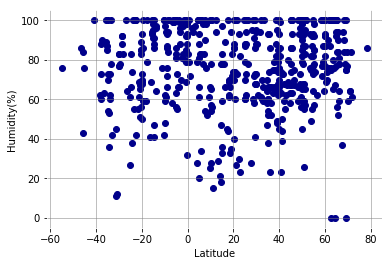

In [20]:
plt.scatter(lat_hum["latitude"], lat_hum["humidity"], color="darkblue", marker="o")
plt.grid(True, color='grey', linestyle='-', linewidth=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

### Latitude vs Cloudiness

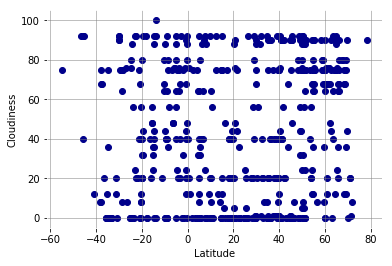

In [17]:
plt.scatter(lat_cloud["latitude"], lat_cloud["cloudiness"], color="darkblue", marker="o")
plt.grid(True, color='grey', linestyle='-', linewidth=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

### Latitude vs Wind Speed(mph)

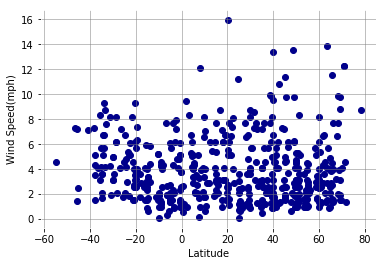

In [18]:
plt.scatter(lat_wind["latitude"], lat_wind["wind speed"], color= "darkblue", marker="o")
plt.grid(True, color='grey', linestyle='-', linewidth=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()